In [70]:
import numpy as np
import math as mp
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
gamma = 1
eta = 2
sigma = 5
beta_hh = 0.99
r = 0.01
beta = 1 /( 1.0 +r)
beta1 =1/( (1.0 +r* np.exp(30/(36.5*0.9)))) 
W = 1
power = (1+eta)/(-gamma-eta)
mu = 0.1

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2175/2291322681.py:6: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2175/2291322681.py:7: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2175/2291322681.py:9: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


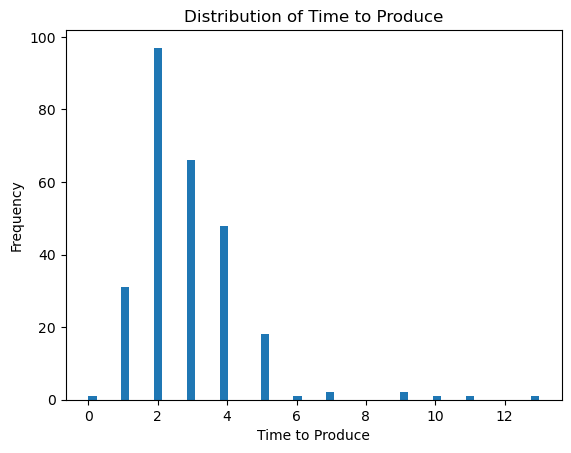

In [72]:
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]
argmins
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tprod = (beta*c)**tau * (tau + N)
plt.hist(tau, bins = 55, alpha=1, label='tau_noise')
plt.xlabel('Time to Produce')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Produce')
plt.show()
tau = np.array(tau, dtype=int)

In [73]:
power = (1+eta)/(-gamma-eta)
tau1= -1/np.log(beta*c) - N
tau1[tau1<0] = 0  
tau1_floor = np.floor(tau1)
tau1_ceil = np.ceil(tau1)
tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)**1
tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)**1

tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = (beta*c)**tau1 * (tau1 + N)**1

tau1 = tau1[::-1]

tprod=  np.array((beta*c)**tau1 * (tau1 + N)**1 )  
p_ss = 1/tprod1

In [74]:

def consumption_function(P, theta):
    return (P)**power * theta**(1/(gamma+eta))
def euler_equation(P_0, P_1, theta_0, theta_1, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1, theta_1) / consumption_function(P_0, theta_0))**((gamma))
    price_growth_comp = (P_0 / P_1)* (theta_1/theta_0)
    wage_inflation = 1/(consumption_growth_comp / (price_growth_comp *  (beta_hh *   (1+r)) ))
    return wage_inflation
def price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)
    constants = (beta_hh * (1+r))
    price_inflation = 1/ (consumption_growth_comp / constants)
    return price_inflation

In [75]:
power = (1+eta)/(-gamma-eta)
tau1= -1/np.log(beta*c) - N
tau1[tau1<0] = 0  
tau1_floor = np.floor(tau1)
tau1_ceil = np.ceil(tau1)
tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)**1
tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)**1

tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = (beta*c)**tau1 * (tau1 + N)**1

tau1 = tau1[::-1]

tprod1=  np.array((beta*c)**tau1 * (tau1 + N)**1 )  
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))

In [76]:
theta_list = np.ones((5,1))
theta_list[1] = 0.95

In [77]:
consumption = np.zeros((len(theta_list), 1))
consumption[0] = consumption_function(P0, theta_list[0])
for i in range(1, len(theta_list)):
    consumption[i] = consumption_function(P0, theta_list[i])

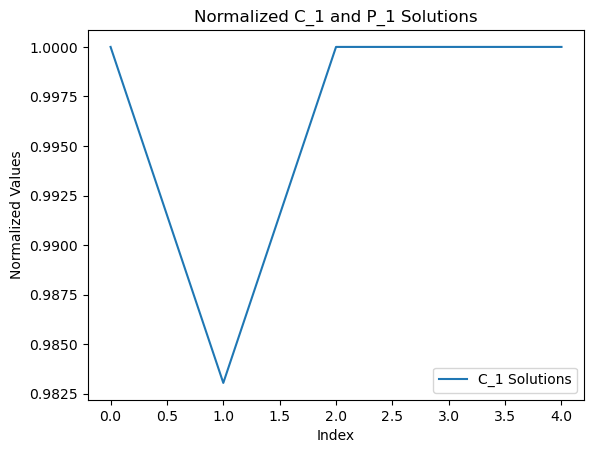

In [78]:
plt.plot(consumption/consumption[0], label='C_1 Solutions')
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.title('Normalized C_1 and P_1 Solutions')
plt.legend()
plt.show()

In [79]:
import numpy as np
sequence_length = 5

r_choice = np.linspace(0, 0.015, 7)  # 20 values between 0 and 1
n_rows = 100000

# Generate random sequences
big_array = np.random.choice(r_choice, size=(n_rows, sequence_length))

print(big_array.shape)  # (1000, 20)
# Ensure uniqueness
unique_big_array = np.unique(big_array, axis=0)

print(unique_big_array.shape)  # May be less than (1000, 20)
r_arrange = unique_big_array
size = r_arrange.shape[0]

(100000, 5)
(16772, 5)


In [80]:
time_length = 20

In [81]:
P = np.zeros((time_length, size))
C = np.zeros((time_length, size))

k=0
tau_list = {}
index_diff_list = {}
beta_org = (1 / (1 + 0.01))*c
tau= -1/np.log(beta_org) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  beta_org**tau_ceil * (tau_ceil + N)
tprod_floor=  beta_org**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0 
tprod1=  np.array(beta_org**tau * (tau + N) )  
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma)) 
tau = np.array(tau, dtype=int)


for w in range(size): 
    beta_list = 1/(1+r_arrange[w]) * c
    if len(beta_list) < max(tau):  
        pad_length = max(tau) - len(beta_list)
        beta_list = np.concatenate([beta_list, np.full(pad_length, beta_org)])        
    P[0,w] = P0
    C[0,w] = P0**power
    # Step 2: Compute beta product per tau
    for j in range(1, time_length ):

        beta_prod = []
        
        for i in range(len(tau)):
            k =tau[i]
            if k == 0:
                beta_prod.append(1.0)
            elif k ==1:
                beta_prod.append(beta_list[0])
            else:
                beta_prod.append(np.prod(beta_list[:k]))
            
        beta_prod = np.array(beta_prod)   
        t_prod_pred = beta_prod * (tau + N)

        P1 = (np.sum(1/(t_prod_pred)**(1-sigma)))**(1/(1-sigma)) 

        C[j,w] = P1**power
        P[j,w] = P1
        beta_list = np.concatenate([beta_list[1:], np.array(beta_org)])



In [94]:
k=0
deviation_gap = np.zeros((size, 1))
C_consumption = np.zeros((size, time_length)) 
inflation_list = np.zeros((size, time_length))
for r in r_arrange: 
    C_temp = C[:,k]
    C_temp_no_zeros = C_temp[C_temp != 0]
    P_temp = P[:,k]
    P_temp_no_zeros = P_temp[P_temp != 0]
    
    Y = np.zeros((len(C_temp_no_zeros), 1))
    rho = 0.         # Persistence of mean reversion
    theta_list = np.zeros(len(C_temp_no_zeros))

    theta_list[0] = 1.0             # Initial value
    theta_list[1] = 0.8        # Shock at t = 1

    for t in range(2, len(C_temp_no_zeros)):
        theta_list[t] = rho * theta_list[t - 1] + (1 - rho) * 1.0
    Y[0] = (C_temp_no_zeros[0]) * theta_list[0]**(1/(gamma + eta)) 
    Y[1:,0] = (C_temp_no_zeros[1:]) * theta_list[1:]**(1/(gamma + eta)) 

    inflation = np.zeros(len(P_temp_no_zeros))
    for t in range(1, len(C_temp_no_zeros)):
        inflation[t] = (P_temp_no_zeros[t]-P_temp_no_zeros[t-1])/P_temp_no_zeros[t-1]

    Y = Y/Y[-1]
    deviation_gap[k] = np.sum((Y - 1 )**2)   # Adding inflation deviation  
    C_consumption[k, :len(Y)] = Y.flatten()
    inflation_list[k, :len(inflation)] = inflation.flatten()
    k = k+1

In [95]:
P_temp_no_zeros

array([0.0372093 , 0.03762037, 0.03761581, 0.03759376, 0.03753418,
       0.03739174, 0.0372093 , 0.0372093 , 0.0372093 , 0.0372093 ,
       0.0372093 , 0.0372093 , 0.0372093 , 0.0372093 , 0.0372093 ,
       0.0372093 , 0.0372093 , 0.0372093 , 0.0372093 , 0.0372093 ])

In [96]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]
argmins_gap
print(r_arrange[argmins_gap])

[[0.     0.     0.0025 0.0125 0.01  ]]


In [97]:
target = np.array([0.01]*   sequence_length)

matches = np.all(np.isclose(r_arrange, target), axis=1)

In [103]:

target = np.array([0, 0, 0.0025, 0.01, 0.01])

matches2 = np.all(np.isclose(r_arrange, target), axis=1)

In [104]:
print(r_arrange[matches])
print(r_arrange[matches2])
print(r_arrange[argmins_gap])

[[0.01 0.01 0.01 0.01 0.01]]
[[0.     0.     0.0025 0.01   0.01  ]]
[[0.     0.     0.0025 0.0125 0.01  ]]


In [105]:
inflation_list[matches,:6].T

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

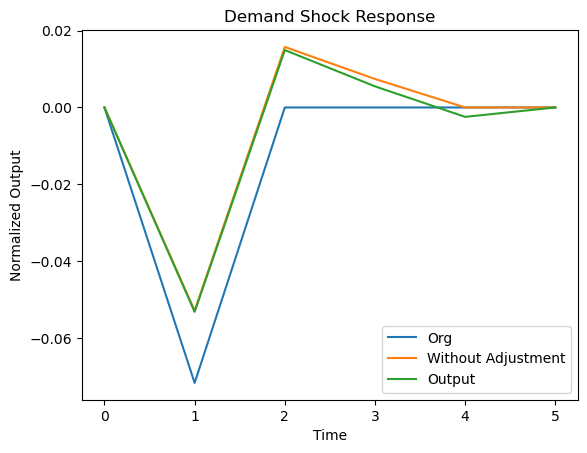

In [106]:


plt.plot(C_consumption[matches,:6].T-1, label='Org')
plt.plot(C_consumption[matches2,:6].T-1, label='Without Adjustment')
plt.plot( C_consumption[argmins_gap, :6].T-1, label='Output')
plt.legend()
plt.title('Demand Shock Response')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()

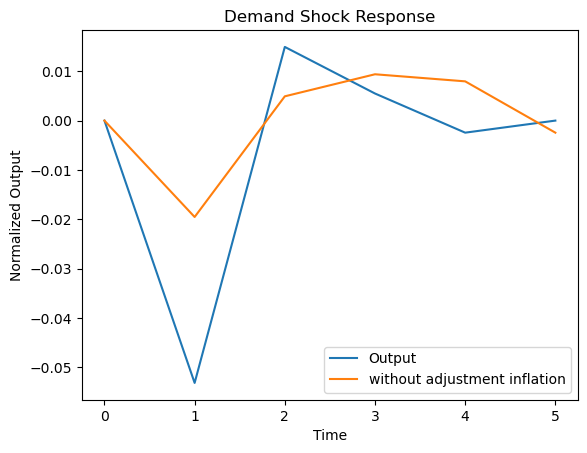

In [107]:
plt.plot( C_consumption[argmins_gap, :6].T-1, label='Output')
plt.plot(inflation_list[argmins_gap,:6].T, label='without adjustment inflation')
plt.legend()
plt.title('Demand Shock Response')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()